# Model developement to predict the rating of a movie

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
# Import the datasets
IMDB_only = pd.read_csv('pre-processed_dataset/IMDB_only.csv', index_col = 0)
IMDB_Kaggle_common = pd.read_csv('pre-processed_dataset/IMDB_Kaggle_common.csv', index_col = 0)

In [3]:
IMDB_only.shape

(69405, 1028)

In [4]:
#IMDB_only.head(3)

In [5]:
#IMDB_Kaggle_common.shape

In [6]:
IMDB_only.columns[:10]

Index(['duration_min', 'avg_vote', 'votes', 'reviews_from_users', 'News',
       'Mystery', 'Adventure', 'Western', 'Crime', 'Music'],
      dtype='object')

In [7]:
y = IMDB_only['avg_vote']
X = IMDB_only.drop(columns = 'avg_vote')


In [8]:
print(X.shape)
print(y.shape)

(69405, 1027)
(69405,)


In [9]:
X.duration_min.describe()

count    69405.000000
mean        -0.018507
std          0.992714
min         -3.260875
25%         -0.622606
50%         -0.173539
75%          0.500062
max          2.296330
Name: duration_min, dtype: float64

In [10]:
X.votes.describe()

count    69405.000000
mean        -0.038108
std          0.945104
min         -0.431199
25%         -0.418282
50%         -0.385334
75%         -0.233885
max          3.661702
Name: votes, dtype: float64

In [11]:
X.reviews_from_users.describe()

count    69405.000000
mean        -0.039353
std          0.950349
min         -0.592384
25%         -0.533162
50%         -0.414716
75%         -0.079120
max          3.355803
Name: reviews_from_users, dtype: float64

In [12]:
np.max(y)

9.8

## train test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
print(X_train.shape)
print(X_test.shape)

(48583, 1027)
(20822, 1027)


In [15]:
IMDB_only.avg_vote.describe()

count    69405.000000
mean         5.920125
std          1.218230
min          1.000000
25%          5.300000
50%          6.100000
75%          6.800000
max          9.800000
Name: avg_vote, dtype: float64

In [16]:
X.head(2)

,duration_min,votes,reviews_from_users,News,Mystery,Adventure,Western,Crime,Music,Documentary,...,Wallis-Hazen,Filmirage,Embrafilme,Duea Film,Hrvatska Radiotelevizija (HRT),Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles,Art Theatre Guild (ATG),Lakeshore Entertainment,Alliance Atlantis Communications,Merchant Ivory Productions
3,0.050995,-0.398719,-0.118602,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.745274,-0.231077,-0.000156,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Ordinary Linear Regression

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

In [18]:
np.max(y_train_predict)

9.191993064943755

In [19]:
lr.intercept_

6.363162574929101

In [20]:
sorted(lr.coef_)[:10]

[-1055696390276.3325,
 -2.850835218714515,
 -1.9004834592342377,
 -1.7649666219949722,
 -1.3444380015134811,
 -1.3395141586661339,
 -1.268185779452324,
 -1.2502575544640422,
 -1.2064049541950226,
 -1.1963471733033657]

In [21]:
r2_score(y_train, y_train_predict)

0.44438539075149

In [22]:
np.max(y_train_predict)

9.191993064943755

In [23]:
r2_score(y_test, y_test_predict)

-3.5996195109918347e+19

In [24]:
np.max(y_test)

9.7

In [25]:
#language and production_company are giving the problem.
# With 200 languages y_test_predict = 9.08, r2_score = -4.5023 * 10+19
# production company is creating problem. while including this y_max = 292905286886.47784

In [26]:
np.max(y_test_predict)

4042835236.2761936

In [27]:
#len(y>10)

In [28]:
#type(y_test_predict)

<function matplotlib.pyplot.show(close=None, block=None)>

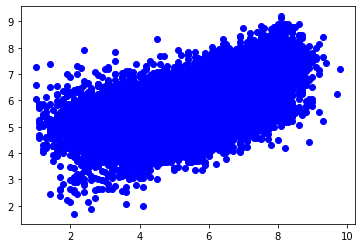

In [29]:
plt.scatter(y_train,y_train_predict,  color = 'b')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

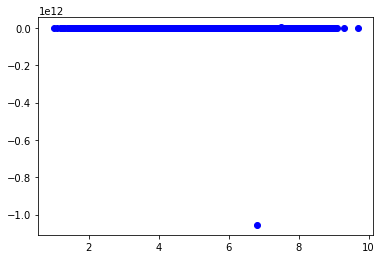

In [30]:
# plot the y_test and y_predict
plt.scatter(y_test,y_test_predict,  color = 'b')
plt.show

In [31]:
from sklearn.metrics import mean_squared_error
print("The mean squared error:", mean_squared_error(y_test, y_test_predict))

from sklearn.metrics import mean_squared_error
print("The root mean squared error:", mean_squared_error(y_test, y_test_predict, squared = False))

from sklearn.metrics import mean_absolute_error
print("The mean absolute error:", mean_absolute_error(y_test, y_test_predict))

The mean squared error: 5.352565617906925e+19
The root mean squared error: 7316123029.246382
The mean absolute error: 50895170.49911692


### Lasso Linear Regression

In [32]:
alpha = [0.1, 1, 10, 100, 1000]
for alp in alpha:
    lasso1 = Lasso(alpha=alp)
    lasso1.fit(X_train, y_train)
    y_train_predict1 = lasso1.predict(X_train)
    y_test_predict1 = lasso1.predict(X_test)
    print(alp)
    print(r2_score(y_train, y_train_predict1))
    print(r2_score(y_test, y_test_predict1))

0.1
0.1831194386116668
0.19113166123051628
1
0.0
-0.0001435547625374678
10
0.0
-0.0001435547625374678
100
0.0
-0.0001435547625374678
1000
0.0
-0.0001435547625374678


In [33]:
alpha2 = [0.01, 0.1, 1, 10, 100, 1000]
for alp2 in alpha2:
    Rge = Ridge(alpha=alp2)
    Rge.fit(X_train, y_train)
    y_train_predict2 = Rge.predict(X_train)
    y_test_predict2 = Rge.predict(X_test)
    print(alp2)
    print(r2_score(y_train, y_train_predict2))
    print(r2_score(y_test, y_test_predict2))
    print(np.max(y_test_predict2))

0.01
0.44438536368402826
0.4264149618655648
9.085787432665647
0.1
0.444382754028419
0.42652232459567996
9.070298472059282
1
0.44424475129066177
0.4272252558423708
8.938035086581024
10
0.44026678256230334
0.42767751125437037
8.786087233403844
100
0.4120486051580955
0.4085459595828542
8.62341831123646
1000
0.36418273905839804
0.3667556594488717
8.411264111032299


In [34]:
Rge3 = Ridge()
alpha = [0.01, 0.1, 1, 10, 100, 1000]
parameters = {'alpha': alpha}
rge3_grid = GridSearchCV(Rge3, param_grid = parameters, scoring = 'r2', cv = 5)
rge3_grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [35]:
print(rge3_grid.best_score_)
print(rge3_grid.best_params_)

0.2067423790830239
{'alpha': 1}


In [36]:
Rge4 = Ridge()
alpha4 = {'alpha': np.linspace(0.01, 1000, 50)} 
Rge4_random = RandomizedSearchCV(Rge4, param_distributions = alpha4, cv = 5)
Rge4_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': array([1.00000000e-02, 2.04179592e+01, 4.08259184e+01, 6.12338776e+01,
       8.16418367e+01, 1.02049796e+02, 1.22457755e+02,...
       6.53064694e+02, 6.73472653e+02, 6.93880612e+02, 7.14288571e+02,
       7.34696531e+02, 7.55104490e+02, 7.75512449e+02, 7.95920408e+02,
       8.16328367e+02, 8.36736327e+02, 8.57144286e+02, 8.77552245e+02,
       8.97960204e+02, 9.18368163e+02, 9.38776122e+02, 9.59184082e+02,
       9.79592041e+02, 1.00000000e+03])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=Non

In [37]:
print(Rge4_random.best_score_)
print(Rge4_random.best_params_)

0.42320565300866236
{'alpha': 0.01}


# Model optimization

# Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state = 42)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [39]:
y_predict3 = regr.predict(X_test)

In [40]:
r2_score(y_test, y_predict3)

0.4470212232046752

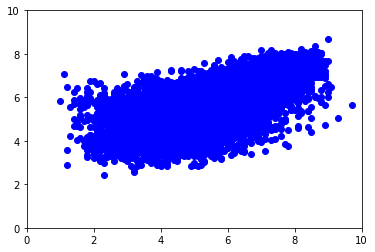

In [41]:
plt.scatter(y_test, y_predict3, color = 'b')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.show()

In [69]:
regr2 = RandomForestRegressor(n_estimators=150, random_state = 42)
regr.fit(X_train, y_train)
y_predict4 = regr.predict(X_test)
r2_score(y_test, y_predict4)

0.4470212232046752

**<font color = 'teal'> Note: From above, it can be concluded that the Random Forest Regressor model performance is better than Linear Regresson model.**

# Gradient boosting 

In [42]:
def opt_gradientboosting(learning_rate, n_estimator, max_features, max_depth):
    for rate in learning_rate:
        gb = GradientBoostingRegressor(learning_rate = rate, n_estimators = n_estimator,  max_features = max_features, max_depth = max_depth)
        gb.fit(X_train, y_train)
        y_gb_predict = gb.predict(X_test)
        score_1 = r2_score(y_test,y_gb_predict)
        print(rate)
        print(score_1)
    return print('End')

#learning_gb.fitX_train, y_trainrates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
#gb = GradientBoostingRegressor()
#n_estimator = 20
#max_features = 1027
#max_depth = [2, 3]
#paramters = {'n_estimators': n_estimator, 'learning_rate': learning_rates, 'max_features':max_features, 'max_depth':max_depth}
#gr = GridSearchCV(gb, param_grid = paramters, n_jobs = -1)
#gr.fit(X_train, y_train)

In [43]:
learning_rate = [0.1, 1, 10, 100, 1000]
opt_gradientboosting(learning_rate, 10, 1027, 3)

0.1
0.2661707507509651
1
0.39065051181065114
10
-3.23227581740827e+18
100
-2.174513539774419e+39
1000
-2.6059614610539425e+59
End


In [45]:
opt_gradientboosting(learning_rate, 20, 1027, 3)

0.1
0.34427684652378165
1
0.4166251716211067
10
-3.929692805933381e+37
100
-1.7785497100809835e+79
1000
-2.554334406299189e+119
End


In [46]:
opt_gradientboosting(learning_rate, 50, 1027, 3)

0.1
0.40587492741054154
1
0.4453242905674415
10
-7.061698447757481e+94
100
-9.731452876924814e+198
1000
-2.950116412610234e+298
End


In [47]:
opt_gradientboosting(learning_rate, 75, 1027, 3)

0.1
0.4226925597372858
1
0.45493882117887563
10
-3.639440638159388e+142
100
-3.5292969708242305e+296


C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb_losses.py:212: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb_losses.py:212: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.p

1000
-inf
End


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_regression.py:591: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


In [48]:
learning_rate = [0.1, 1]
opt_gradientboosting(learning_rate, 100, 1027, 3)

0.1
0.43286886313591244
1
0.45889560048923905
End


In [49]:
learning_rate = [0.1, 1]
opt_gradientboosting(learning_rate, 120, 1027, 3)

0.1
0.4393029669878036
1
0.45923115130484715
End


In [50]:
learning_rate = [0.1, 1]
opt_gradientboosting(learning_rate, 140, 1027, 3)

0.1
0.4450106035027547
1
0.4579638797795418
End


In [51]:
learning_rate = [0.1, 1]
opt_gradientboosting(learning_rate, 150, 1027, 3)

0.1
0.446714104772609
1
0.4555805488215873
End


In [54]:
learning_rate = [0.1, 1]
opt_gradientboosting(learning_rate, 170, 1027, 3)

0.1
0.4506605226048078
1
0.45977265264552136
End


In [55]:
learning_rate = [0.1, 1]
opt_gradientboosting(learning_rate, 200, 1027, 3)

0.1
0.45544195038940904
1
0.45787480499378164
End


In [56]:
learning_rate = [0.1, 1]
opt_gradientboosting(learning_rate, 225, 1027, 3)

0.1
0.4592504214944393
1
0.4572100969789028
End


In [57]:
learning_rate = [0.1, 1]
opt_gradientboosting(learning_rate, 250, 1027, 3)

0.1
0.46181724226401877
1
0.4581589292304382
End


In [58]:
learning_rate = [0.1, 1]
opt_gradientboosting(learning_rate, 275, 1027, 3)

0.1
0.46406341092521486
1
0.45361864890868486
End


In [60]:
learning_rate = [0.1]
opt_gradientboosting(learning_rate, 300, 1027, 3)

0.1
0.4662849658625744
End


In [61]:
learning_rate = [0.1]
opt_gradientboosting(learning_rate, 325, 1027, 3)

0.1
0.46819489150383453
End


In [62]:
learning_rate = [0.1]
opt_gradientboosting(learning_rate, 350, 1027, 3)

0.1
0.4700930132821026
End


In [63]:
learning_rate = [0.1]
opt_gradientboosting(learning_rate, 400, 1027, 3)

0.1
0.4734320440604374
End


In [64]:
learning_rate = [0.1]
opt_gradientboosting(learning_rate, 450, 1027, 3)

0.1
0.4767236738584849
End


In [65]:
learning_rate = [0.1]
opt_gradientboosting(learning_rate, 500, 1027, 3)

0.1
0.4788066919497518
End


In [66]:
learning_rate = [0.1]
opt_gradientboosting(learning_rate, 550, 1027, 3)

0.1
0.48102852104296423
End


In [67]:
learning_rate = [0.1]
opt_gradientboosting(learning_rate, 700, 1027, 3)

0.1
0.48531646822394703
End


In [68]:
learning_rate = [0.1]
opt_gradientboosting(learning_rate, 800, 1027, 3)

0.1
0.4877544861834895
End


### With best n_estimator = 700, increase the max_depth from 3 to 5

In [70]:
learning_rate = [0.1]
opt_gradientboosting(learning_rate, 700, 1027, 5)

0.1
0.5029195974259342
End


In [71]:
learning_rate = [0.1]
opt_gradientboosting(learning_rate, 700, 1027, 7)

0.1
0.5088503632361199
End


### Got best n_estimator = 700, max_depth = 7

In [72]:
learning_rate = [0.1]
opt_gradientboosting(learning_rate, 700, 1027, 10)

0.1
0.5038913587705087
End


In [73]:
learning_rate = [0.1]
opt_gradientboosting(learning_rate, 700, 900, 7)

0.1
0.5089865123584758
End


In [74]:
learning_rate = [0.1]
opt_gradientboosting(learning_rate, 700, 500, 7)

0.1
0.5117170075319708
End


In [75]:
learning_rate = [0.1]
opt_gradientboosting(learning_rate, 700, 400, 7)

0.1
0.5121897655975621
End


In [76]:
learning_rate = [0.1]
opt_gradientboosting(learning_rate, 700, 300, 7)

0.1
0.5127843354771702
End


#### Among all models, Gradient boosting with learning_rate = 0.1, n_estimator = 700, max_features = 300, Max_depth = 7 is good upto this point, however, more optimization is needed to obtain the best model.

In [ ]:
gb = 

In [ ]:
#a = opt_gradientboosting(0.1, 10, 1027, 3)
#print(a)
#b = opt_gradientboosting(0.1, 10, 1027, 5)
#print(b)
#c = opt_gradientboosting(0.1, 10, 1027, 7)
#print(c)
#d = opt_gradientboosting(0.1, 10, 1027, 10)
#print(d)

In [ ]:
#a2 = opt_gradientboosting(1, 10, 1027, 3)
#print(a2)
#b2 = opt_gradientboosting(1, 10, 1027, 5)
#print(b2)
#c2 = opt_gradientboosting(1, 10, 1027, 7)
#print(c2)
#d2 = opt_gradientboosting(1, 10, 1027, 10)
#print(d2)

In [ ]:
#learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
#n_estimator = [100, 150, 200]
#max_features = [800, 900, 1000, 1087]
#max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
#gb = GradientBoostingRegressor()

# Save the best model parameter for further use

In [ ]:
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
best_model = gb6
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
#best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
#best_model.build_datetime = datetime.datetime.now()

In [ ]:
# save the best model to disk
import os
import pickle
pickle.dump(best_model, open('Best_model.sav', 'wb'))